In [13]:
import cv2                    
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

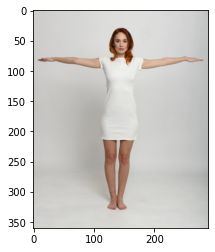

In [35]:
img = cv2.cvtColor(cv2.imread('test/test1.jpg'),cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [36]:
results = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5).process(img)


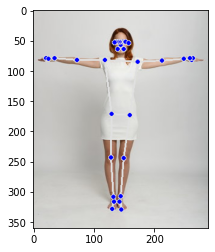

In [37]:
# # cv2.imshow('Test Mediapipe', img)
mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
plt.imshow(img)
plt.show()

In [38]:
# pp = results.pose_landmarks.landmark
# # print([(str(pp[i].x) + "," + str(pp[i].y) + "," + str(pp[i].z) + "," + str(pp[i].visibility)) for i in range(33)])
# a = ",".join([(str(pp[i].x) + "," + str(pp[i].y) + "," + str(pp[i].z) + "," + str(pp[i].visibility)) for i in range(33)])
# a
results.pose_landmarks.landmark

[x: 0.4991098940372467
y: 0.15970075130462646
z: -0.7074760794639587
visibility: 0.9999456405639648
, x: 0.513378381729126
y: 0.14476600289344788
z: -0.6734445095062256
visibility: 0.9997575879096985
, x: 0.5214346051216125
y: 0.14517614245414734
z: -0.6734724044799805
visibility: 0.9997642636299133
, x: 0.5275499820709229
y: 0.1455920934677124
z: -0.6736310720443726
visibility: 0.9997816681861877
, x: 0.49003732204437256
y: 0.14478415250778198
z: -0.6716111302375793
visibility: 0.9997320771217346
, x: 0.48022720217704773
y: 0.14500561356544495
z: -0.6717305183410645
visibility: 0.9996919631958008
, x: 0.4722694754600525
y: 0.14529237151145935
z: -0.6716680526733398
visibility: 0.9996733665466309
, x: 0.5431587100028992
y: 0.15221774578094482
z: -0.43855804204940796
visibility: 0.9996529817581177
, x: 0.46397027373313904
y: 0.1499822735786438
z: -0.4346749484539032
visibility: 0.9994204044342041
, x: 0.5154645442962646
y: 0.18005861341953278
z: -0.6179326176643372
visibility: 0.9997388

In [19]:
f = open("data_set.csv", "w")

In [20]:
f.write(",".join([str(i) for i in range(132)]))
f.write(",class_no,class_name\n")

21

In [21]:
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,50)
fontScale              = 0.5
fontColor              = (255,0,0)
thickness              = 1
lineType               = 2

In [22]:
# version desktop
def collectingData2CSV(video_name, class_no, class_name, max_frames=1000):
    cap = cv2.VideoCapture(video_name)
    c = 0
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # image.flags.writeable = False

            results = pose.process(image)

            # image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            resized_img = cv2.resize(image, (394, 700))

            # display(resized_img)
            cv2.putText(resized_img, video_name + " @frames "+str(c) + "\n" + class_name, 
                bottomLeftCornerOfText, 
                font, 
                fontScale,
                fontColor,
                thickness,
                lineType)
            cv2.imshow("show pose detection",resized_img)

            landmarklist = results.pose_landmarks.landmark

            f.write(",".join([(str(landmarklist[i].x) + "," + str(landmarklist[i].y) + "," + str(landmarklist[i].z) + "," + str(landmarklist[i].visibility)) for i in range(33)]))
            f.write("," + str(class_no) + "," + class_name + "\n")

            c += 1
            
            if (c >= max_frames):
                break
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
            
    cap.release()
    # out.release()
    cv2.destroyAllWindows()
    print("Complete collecting data from", video_name, "from a total of ", c, "frames")

In [23]:
collectingData2CSV('sample/standing-sample.mp4', 0, 'standing', max_frames=500)

Complete collecting data from sample/standing-sample.mp4 from a total of  500 frames


In [24]:
collectingData2CSV('sample/standing-sample-2.mp4', 0, 'standing', max_frames=500)

Complete collecting data from sample/standing-sample-2.mp4 from a total of  223 frames


In [25]:
collectingData2CSV('sample/t-pose-sample.mp4', 1, 't-pose', max_frames=450)

Complete collecting data from sample/t-pose-sample.mp4 from a total of  450 frames


In [26]:
collectingData2CSV('sample/x-pose-sample.mp4', 2, 'x-pose', max_frames=500)

Complete collecting data from sample/x-pose-sample.mp4 from a total of  431 frames


In [27]:
collectingData2CSV('sample/x-pose-sample.mp4', 2, 'x-pose', max_frames=250)

Complete collecting data from sample/x-pose-sample.mp4 from a total of  250 frames


In [28]:
f.close()

In [ ]:
# cap = cv2.VideoCapture(0)
# c = 0
# with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         # image.flags.writeable = False

#         results = pose.process(image)

#         # image.flags.writeable = True
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

#         resized_img = cv2.resize(image, (700, 500))

#         # display(resized_img)
#         cv2.putText(resized_img, "WebCam" + " @frames "+str(c), 
#             bottomLeftCornerOfText, 
#             font, 
#             fontScale,
#             fontColor,
#             thickness,
#             lineType)
#         cv2.imshow("show pose detection",resized_img)

#         landmarklist = results.pose_landmarks.landmark

#         c += 1

#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
        
# cap.release()
# # out.release()
# cv2.destroyAllWindows()